In [1]:
import matplotlib.pyplot as plt
from models.mini_sia import SIA, TUnit, TUnits
import models.mini_sia
from typing import Tuple
import numpy as np
from PIL import Image, ImageOps

%matplotlib inline

In [2]:
def aplanar(matriz):
    bitstring = ''
    for k in range(len(matriz)):
        for w in range(len(matriz[k])):
            bitstring += ''.join([str(int(matriz[k][w][0]))])
    return bitstring

In [3]:
digits = ['0','1','2','3','4','6','7','9']
inp = []
for num in digits:
    inp.append(plt.imread('digits/'+num+'.png'))
for i in range(len(inp)):
    inp[i] = aplanar(inp[i])

In [4]:
antigens =  inp

In [5]:
def format_image(bitstring):
    img = []
    nexti = 0
    for i in range(0, len(bitstring), 12):
        nexti += 12
        row = bitstring[i: nexti]
        img.append(list(map(int, row)))
    return img


In [6]:
def display_multiple_img(images, rows = 1, cols=1):
    figure, ax = plt.subplots(nrows=rows,ncols=cols )
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title])
        ax.ravel()[ind].set_title(title)
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()    

In [7]:
def show_digits(memory):
    images = []
    for key in memory:
        images += [format_image(memory[key])]
    titles = ['0', '1', '2', '3', '4', '6', '7', '9']
    memories = dict(zip(titles, images))
    display_multiple_img(memories,1, 8)

In [8]:
def hamming_func(s1: TUnit, s2: TUnit) -> float:
    summation = 0
    for a, b in zip(s1, s2):
        summation += a != b
    return 120 - summation


In [10]:
sib = SIA(120, 10)
sib.units =  sib.bone_marrow_binary(10, 120)


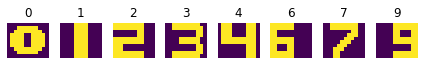

In [11]:
titles = ['0', '1', '2', '3', '4', '6', '7', '9']
show_digits(dict(zip(titles, antigens)))

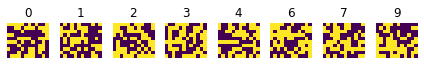

In [20]:
show_digits(dict(zip(titles, sib.units[0:9])))

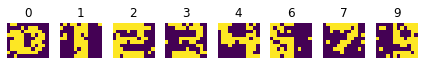

In [12]:
sia = SIA(120, 10)
sia.units =  sia.bone_marrow_binary(10, 120)
sia.clonalg(hamming_func, antigens, 5, 0, 50)
show_digits(sia.memory)

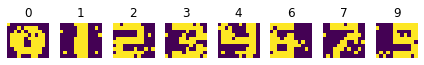

In [13]:
sia = SIA(120, 10)
sia.units =  sia.bone_marrow_binary(10, 120)
sia.clonalg(hamming_func, antigens, 5, 0, 100)
show_digits(sia.memory)

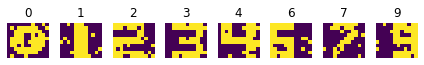

In [14]:
sia = SIA(120, 10)
sia.units =  sia.bone_marrow_binary(10, 120)
sia.clonalg(hamming_func, antigens, 5, 0, 200)
show_digits(sia.memory)

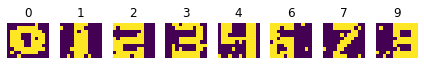

In [15]:
sia = SIA(120, 10)
sia.units =  sia.bone_marrow_binary(10, 120)
sia.clonalg(hamming_func, antigens, 5, 0, 400)
show_digits(sia.memory)

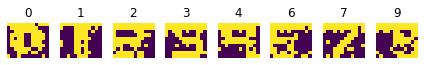

In [27]:
sia = SIA(120, 10)
sia.units =  sia.bone_marrow_binary(10, 120)
sia.clonalg(hamming_func, antigens, 5, 0, 500)
show_digits(sia.memory)

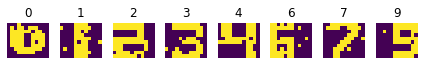

In [16]:
sia = SIA(120, 10)
sia.units =  sia.bone_marrow_binary(10, 120)
sia.clonalg(hamming_func, antigens, 5, 0, 1000)
show_digits(sia.memory)

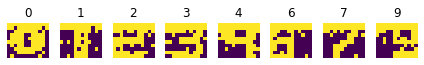

In [35]:
sia = SIA(120, 10)
sia.units =  sia.bone_marrow_binary(10, 120)
sia.clonalg(hamming_func, antigens, 5, 0, 1500)
show_digits(sia.memory)

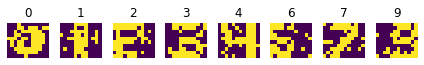

In [24]:
sia = SIA(120, 10)
sia.units =  sia.bone_marrow_binary(10, 120)
sia.clonalg(hamming_func, antigens, 3, 0, 50)
show_digits(sia.memory)


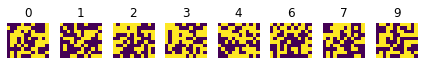

In [21]:
sia = SIA(120, 10)
sia.units =  sia.bone_marrow_binary(10, 120)
sia.clonalg(hamming_func, antigens, 8, 2, 100)
show_digits(sia.memory)